# 1 加载数据

In [2]:

import sys
sys.path.append('/notebooks/pytorch_timeseries')
from torch.optim import Optimizer, Adam
import pandas as pd
pd.options.mode.chained_assignment = None
import torch.nn as nn
from torch_timeseries.datasets.splitter import SequenceRandomSplitter
from torch_timeseries.datasets.wrapper import MultiStepTimeFeatureSet
from torch_timeseries.datasets import *
from torch_timeseries.data.scaler import MaxAbsScaler, StandarScaler
import matplotlib.pyplot as plt


# dataset = ExchangeRate('/notebooks/pytorch_timeseries/data')
dataset = PEMS_BAY('/notebooks/pytorch_timeseries/data')
# dataset.df = dataset.df.set_index('date')


# 2 图片绘制

## 2.1 无坐标 多条 s 横着

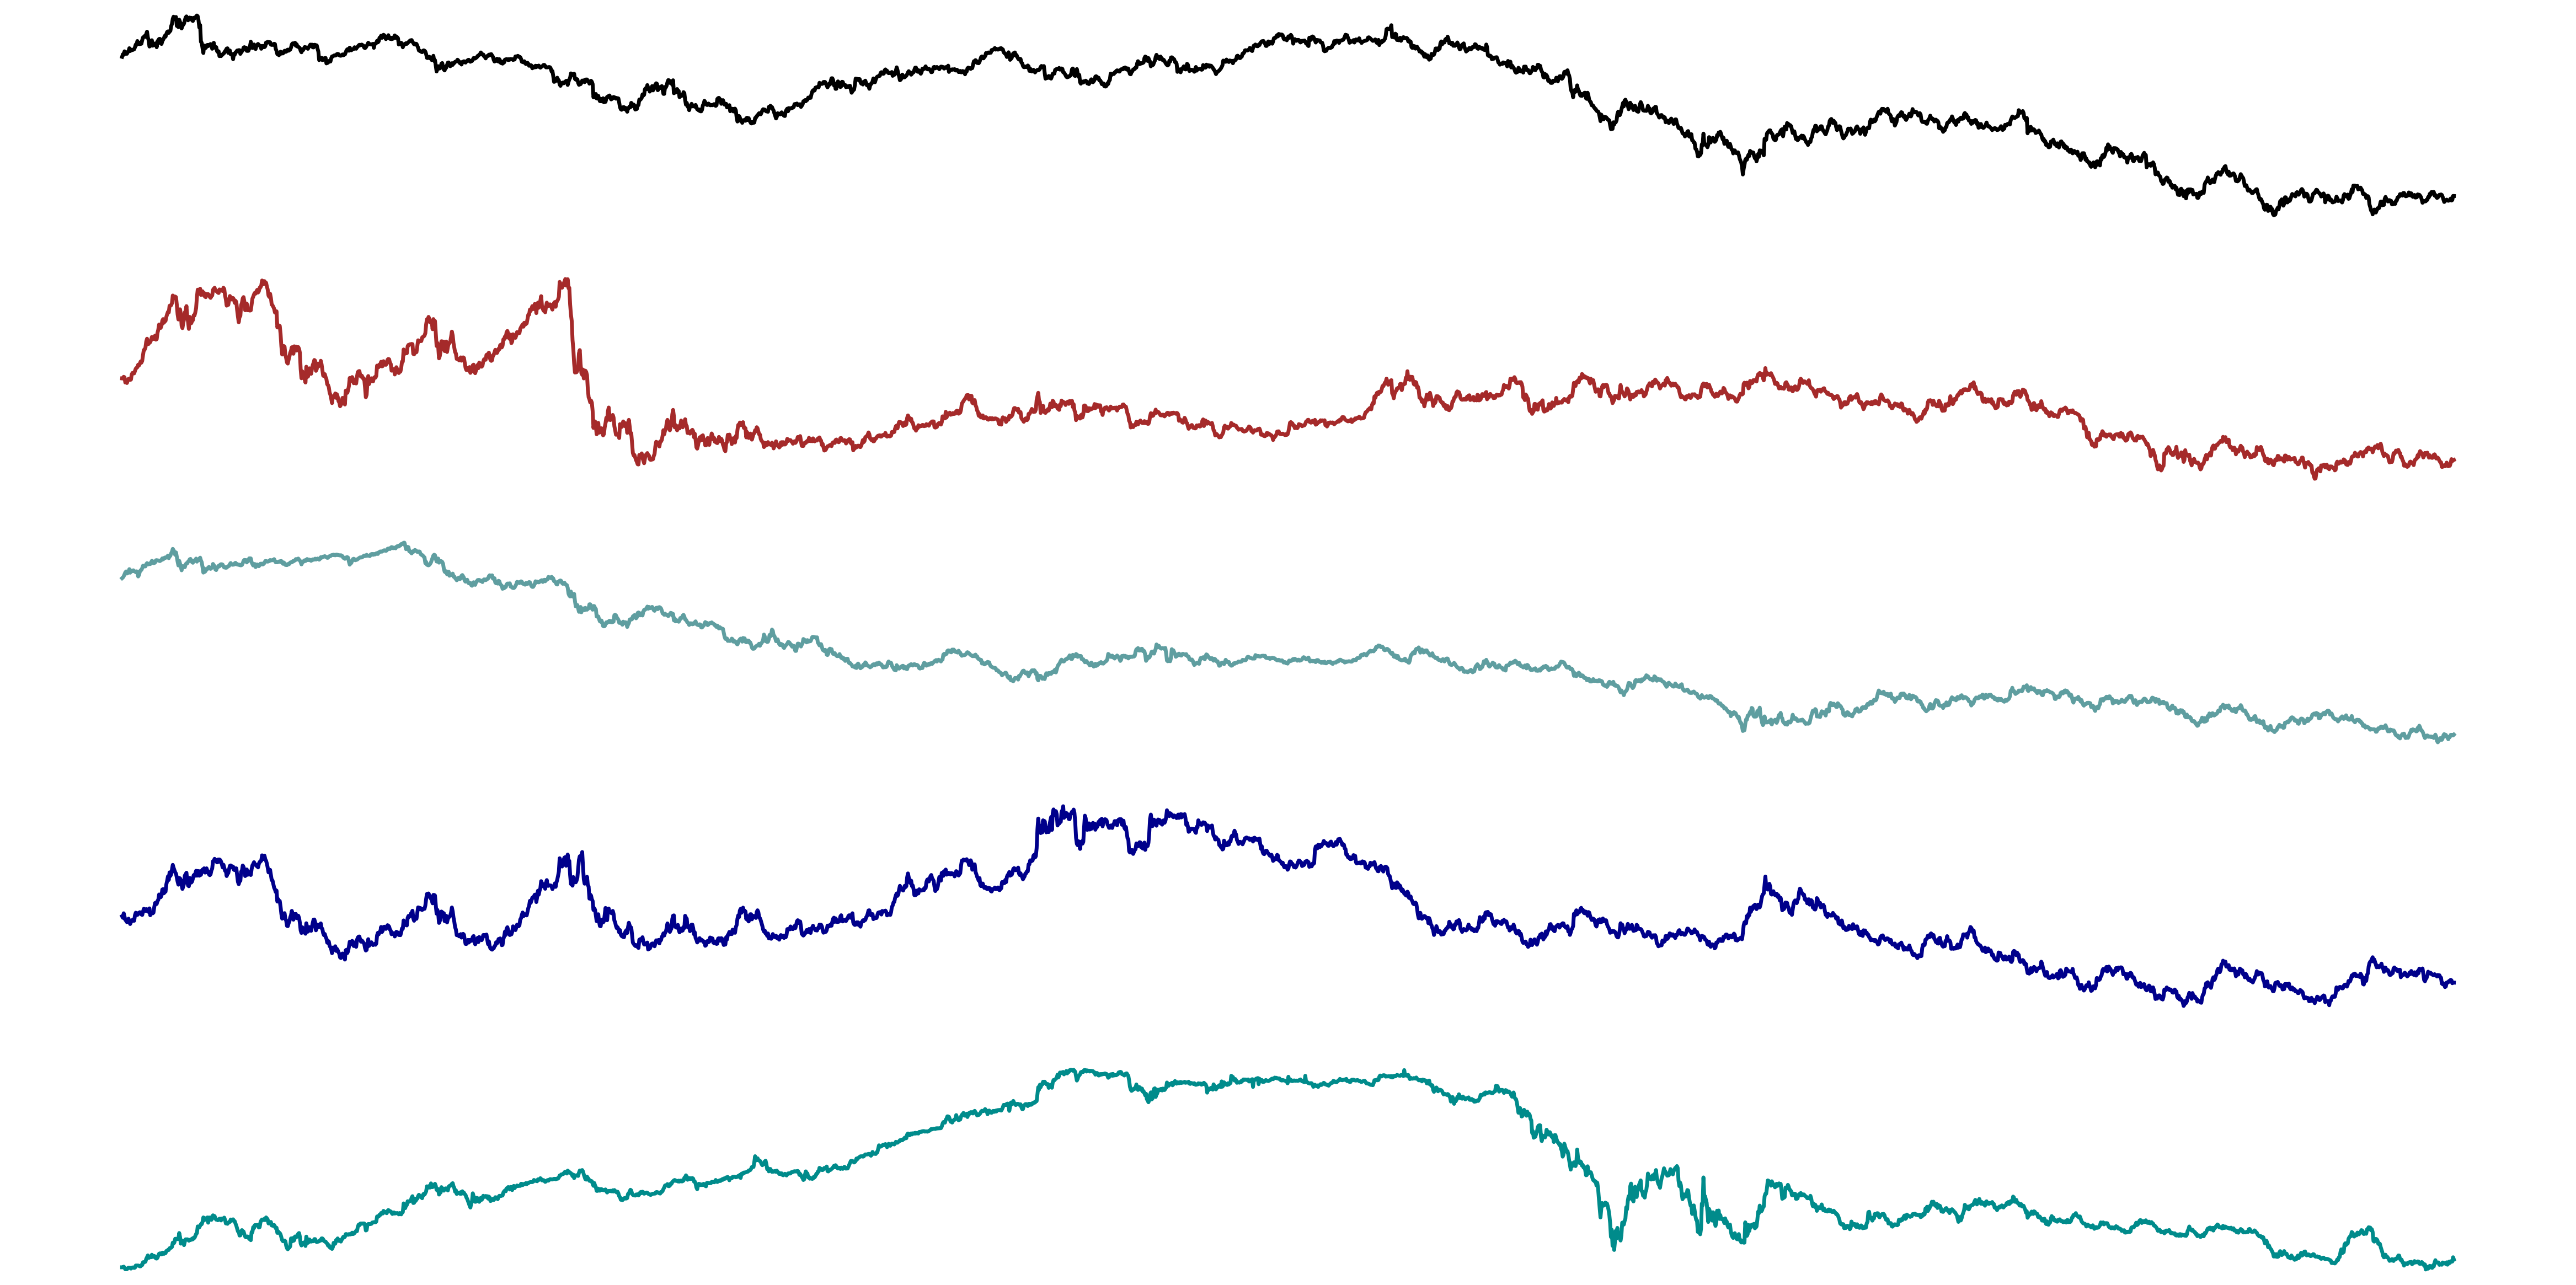

In [20]:
nodes = [1,2,3,4,7]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[100:3000, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
filtered_colors = [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]
# 根据 drawed_data 的长度选择颜色
selected_colors = filtered_colors[:len(nodes)]

fig, axs = plt.subplots(len(nodes), figsize=( 60, 6*len(nodes)))
for i in range(len(nodes)):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], color=selected_colors[i], linewidth=5)
    # axs[i].axis('off')
# fig

plt.savefig('exchangerate.svg', format='svg', bbox_inches='tight')



## 2.2 同坐标s

### matplotlib

<!-- nodes = [1,2,3,4,5]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[100:600, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
filtered_colors = [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]
# 根据 drawed_data 的长度选择颜色
selected_colors = filtered_colors[:len(nodes)]

fig, axs = plt.subplots(len(nodes), figsize=( 60, 6*len(nodes)))
for i in range(len(nodes)):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], color=selected_colors[i], linewidth=8)
    axs[i].axis('off')
# fig

plt.savefig('etth1.svg', format='svg', bbox_inches='tight')
 -->


In [9]:
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
drawed_data = dataset.df.iloc[400:600].copy()
selected_columns = [ 1,2,3, 6,8,9]
colors = ['blue', 'green', 'red', 'c', 'magenta']

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()


NameError: name 'fig' is not defined

## 2.3 plotly

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
drawed_data = dataset.df.iloc[100:2000].copy()
selected_columns = [1,6,9]# [ 1,2,3, 6,8,9]

# 创建三个子图
fig = make_subplots(rows=len(selected_columns), cols=1)

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(
        go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=str(col)),
        row=(i % len(selected_columns)) + 1,  # 将图形分布在三个子图上
        col=1
    )

# 更新每个子图的X轴和Y轴以隐藏它们
for i in range(1, 4):
    fig.update_xaxes(showticklabels=False, showline=False, row=i, col=1)
    fig.update_yaxes(showticklabels=False, showline=False, row=i, col=1)


# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()


## 2.3 t-perspective

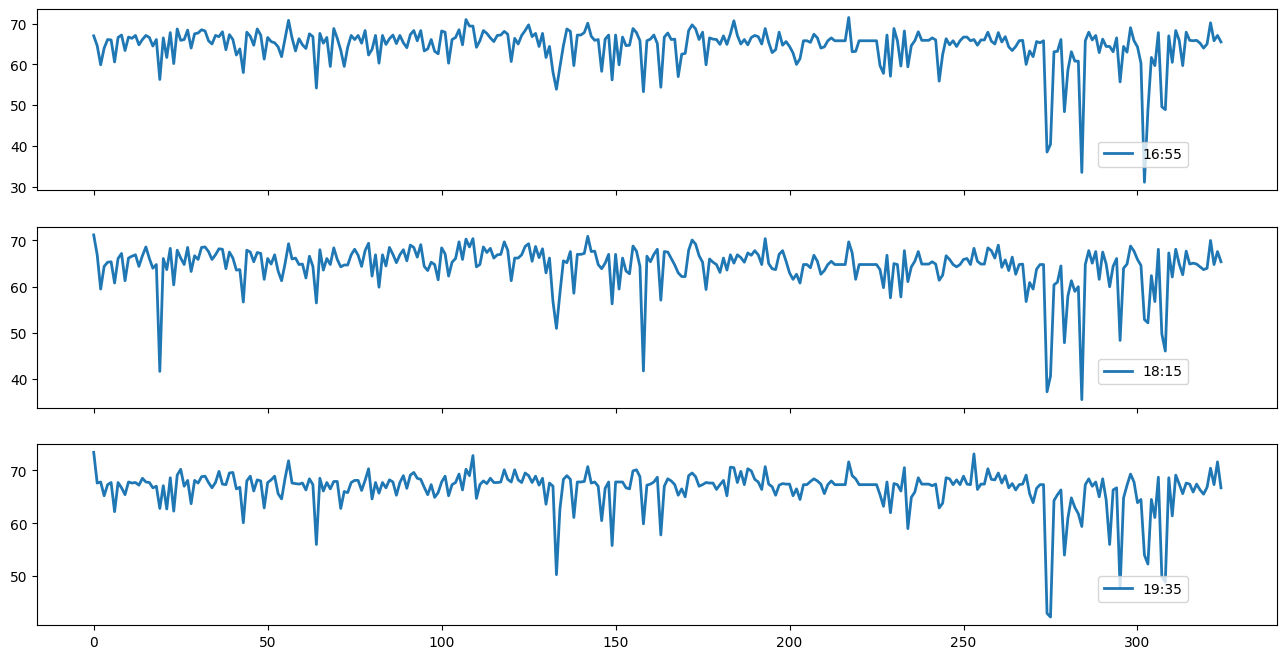

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# 加载数据
# df = pd.read_csv('data.csv', index_col=0)  # 假设第一列是时间戳

num_nodes = dataset.num_features

times = dataset.df[203:250:16].index
fig, axs = plt.subplots(len(times), figsize=(16, 8),sharex=True)
for i, time in enumerate(times):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(range(num_nodes),dataset.df.loc[time, :],  linewidth=2, label= datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S').strftime('%H:%M'))
    # axs[i].axis('off')
    axs[i].legend(loc="center left", bbox_to_anchor=(0.85, 0.2))
plt.savefig('t_perspective.svg', format='svg', bbox_inches='tight')



# # 绘制图形
# # drawed_data = dataset.df[200:600]
# fig, axs = plt.subplots(len(nodes), figsize=(80, 6*5))

# plt.figure(figsize=(10, 6))
# for index, row in drawed_data[50:53].iterrows():
#     plt.plot(range(325), row.values, label=str(index))

# # 添加图例和标签
# plt.legend(title="Time", loc="upper left", bbox_to_anchor=(1, 1))
# fig.xlabel("Sensor ID")
# fig.ylabel("Speeds")
# fig.suptitle("All Sensor Speed Readings Over Time", fontsize=12)
# fig.text(0.5, 0.04, 'Sensor ID', ha='center', va='center')
# fig.text(0.04, 0.5, 'Speeds ', ha='center', va='center', rotation='vertical')

# # 显示图形
# plt.tight_layout()
# plt.show()


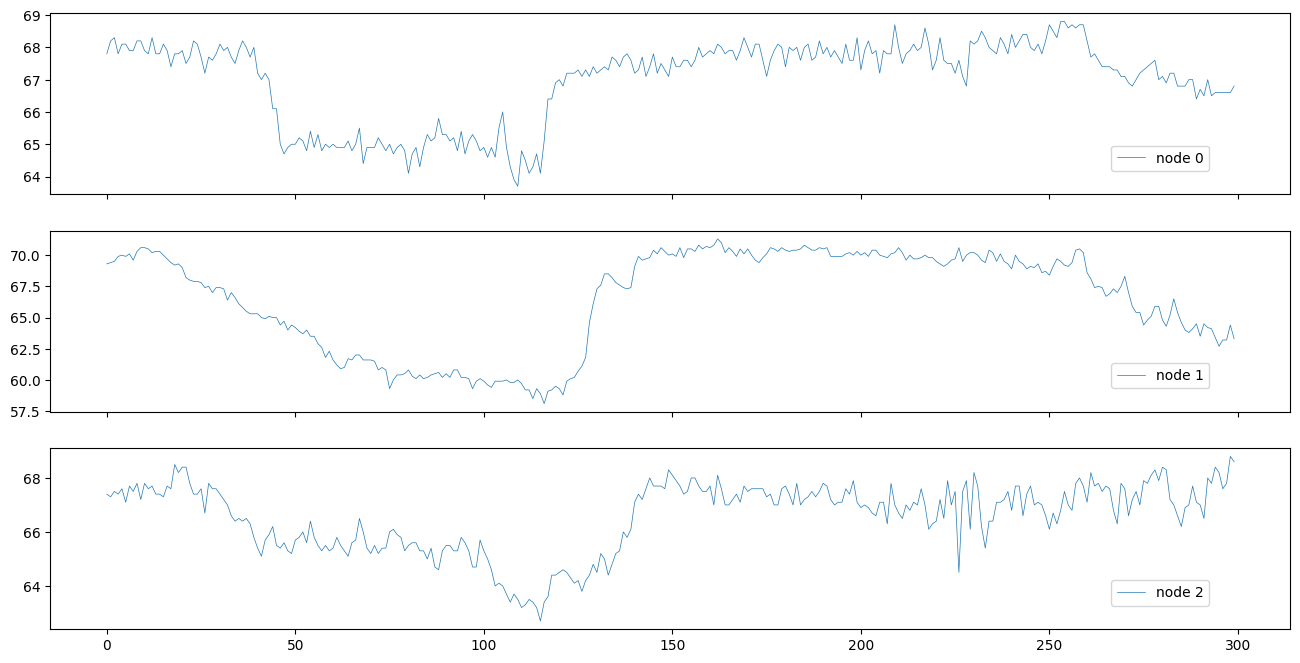

## 2.4 s-perspective

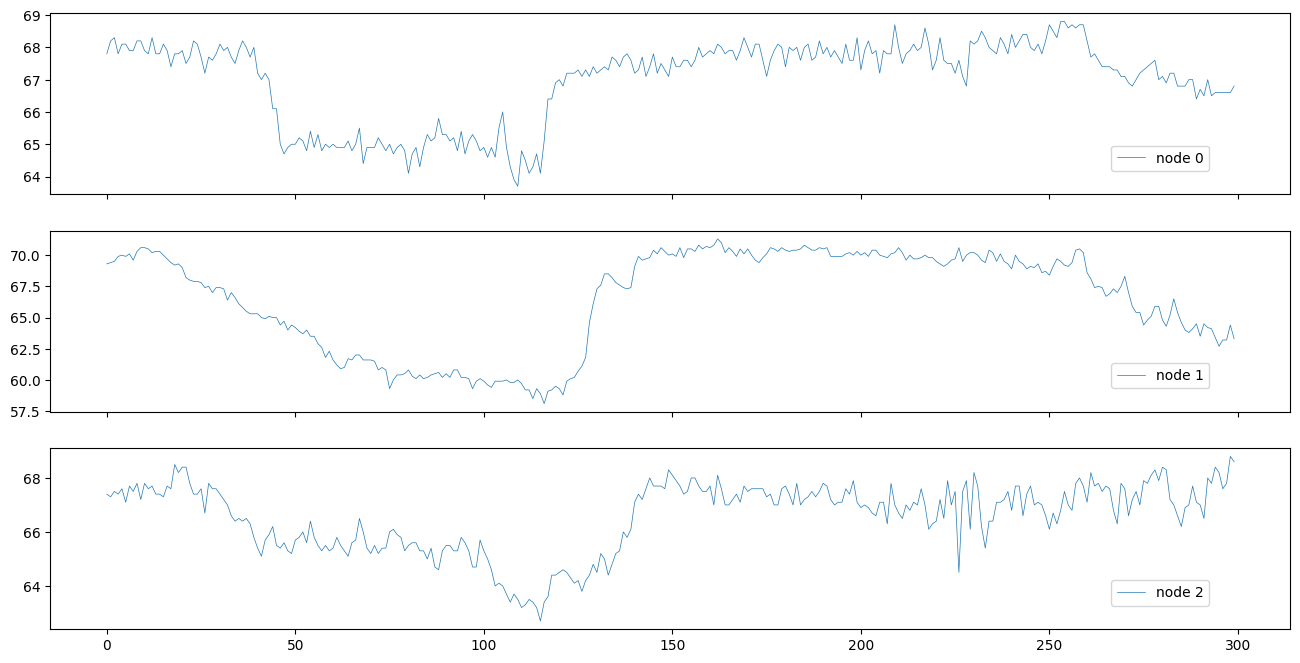

In [6]:
nodes = [1,2,3]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[100:400, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
filtered_colors = [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]
# 根据 drawed_data 的长度选择颜色
# selected_colors = filtered_colors[:len(nodes)]
fig, axs = plt.subplots(3, figsize=(16, 8),sharex=True)
for i in range(3):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], linewidth=0.5, label=f'node {i}')
    axs[i].legend(loc="center left", bbox_to_anchor=(0.85, 0.2))
    # axs[i].axis('off')
# fig

plt.savefig('s_perspective.svg', format='svg', bbox_inches='tight')



# 3 论文图片绘制

## 3.1 s_2_t

## 

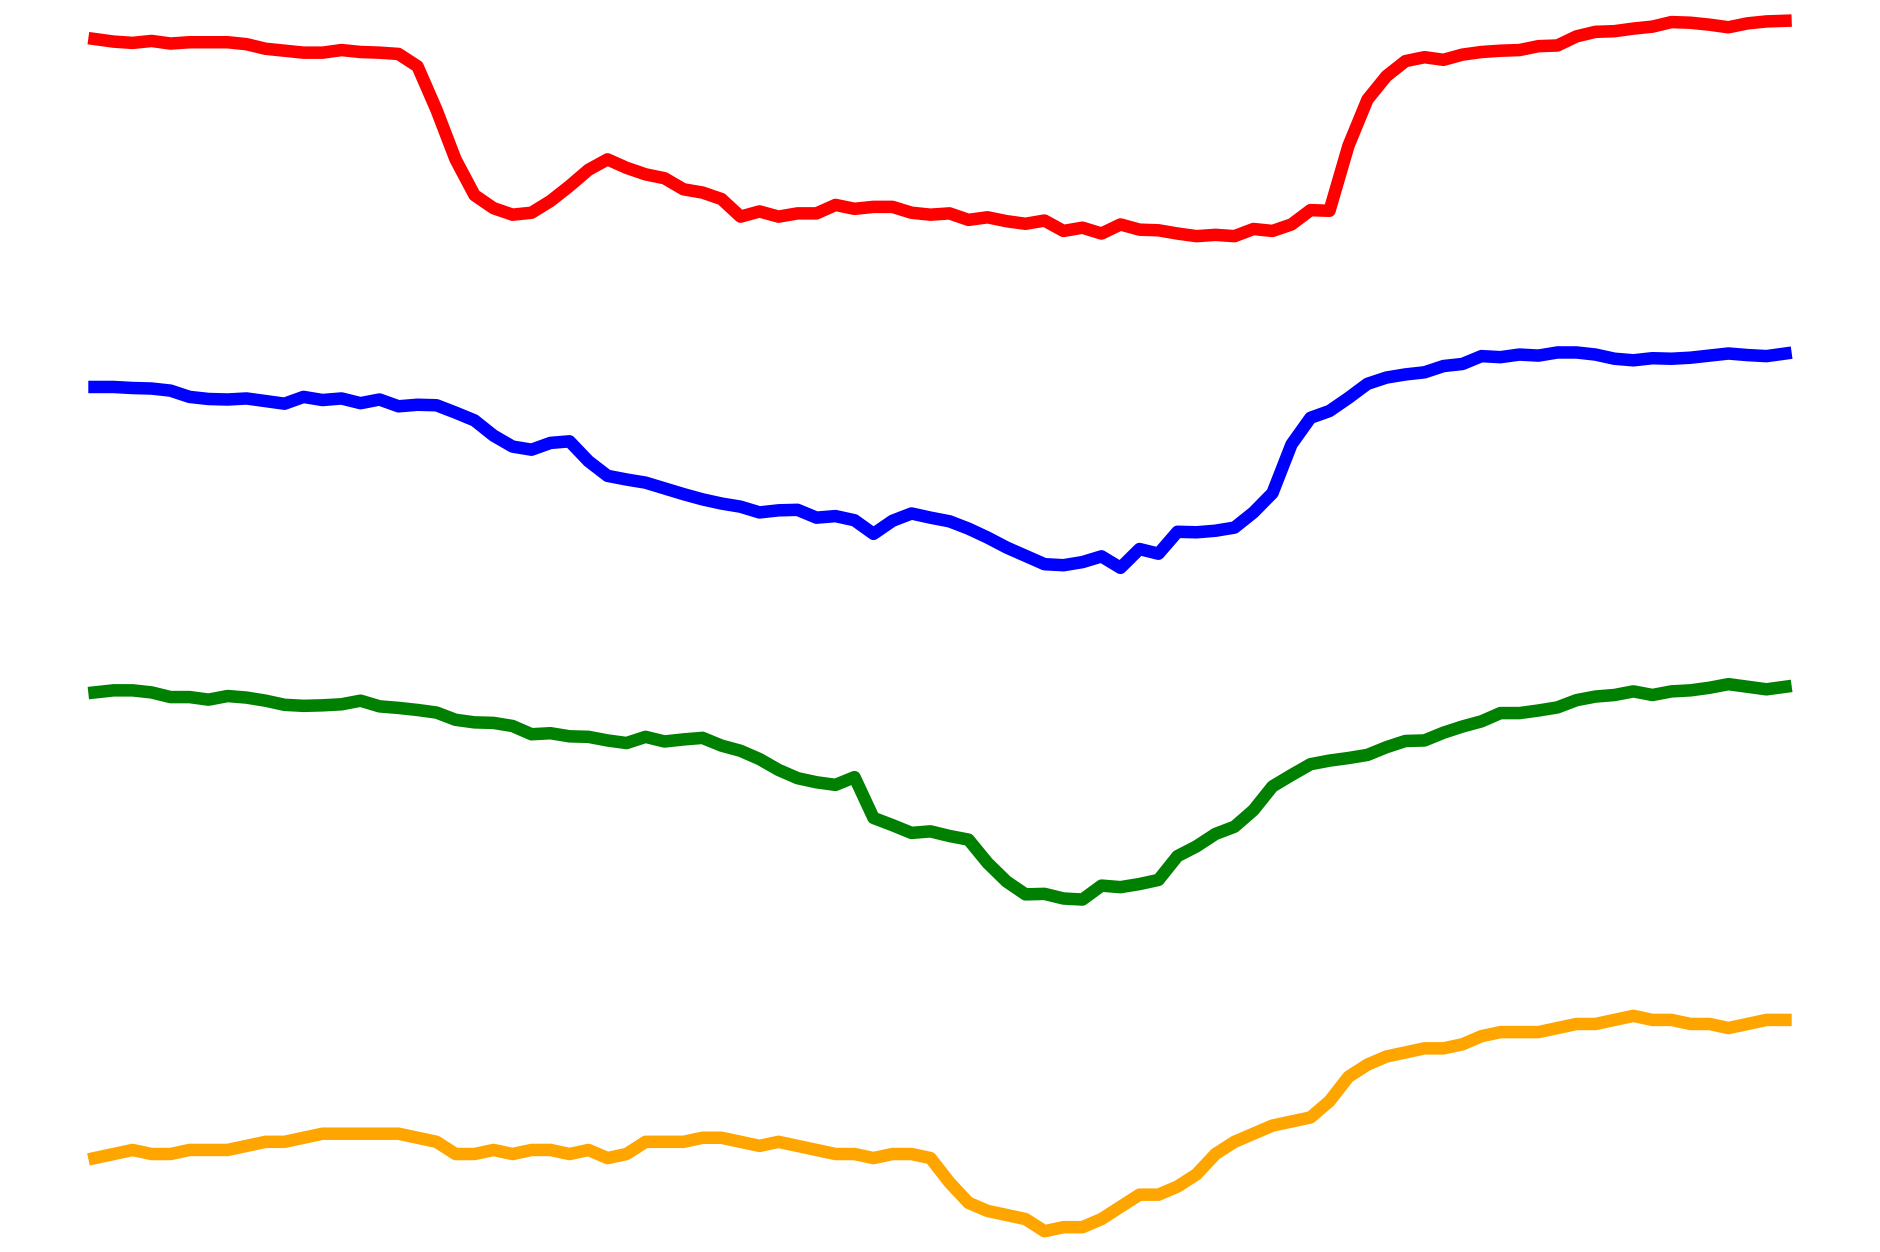

In [21]:
nodes = [1,2,3,4]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[450:540, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
colors = ['red', 'blue', 'green', '#FFA500']

filtered_colors = colors# [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]

# 根据 drawed_data 的长度选择颜色
selected_colors = filtered_colors[:len(nodes)]

fig, axs = plt.subplots(len(nodes), figsize=(6*len(nodes), 4*len(nodes)), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
for i in range(len(nodes)):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], color=selected_colors[i], linewidth=9)
    axs[i].axis('off')

# fig

plt.savefig('traffics_s2t.svg', format='svg', bbox_inches='tight')



## 3.2 t2s

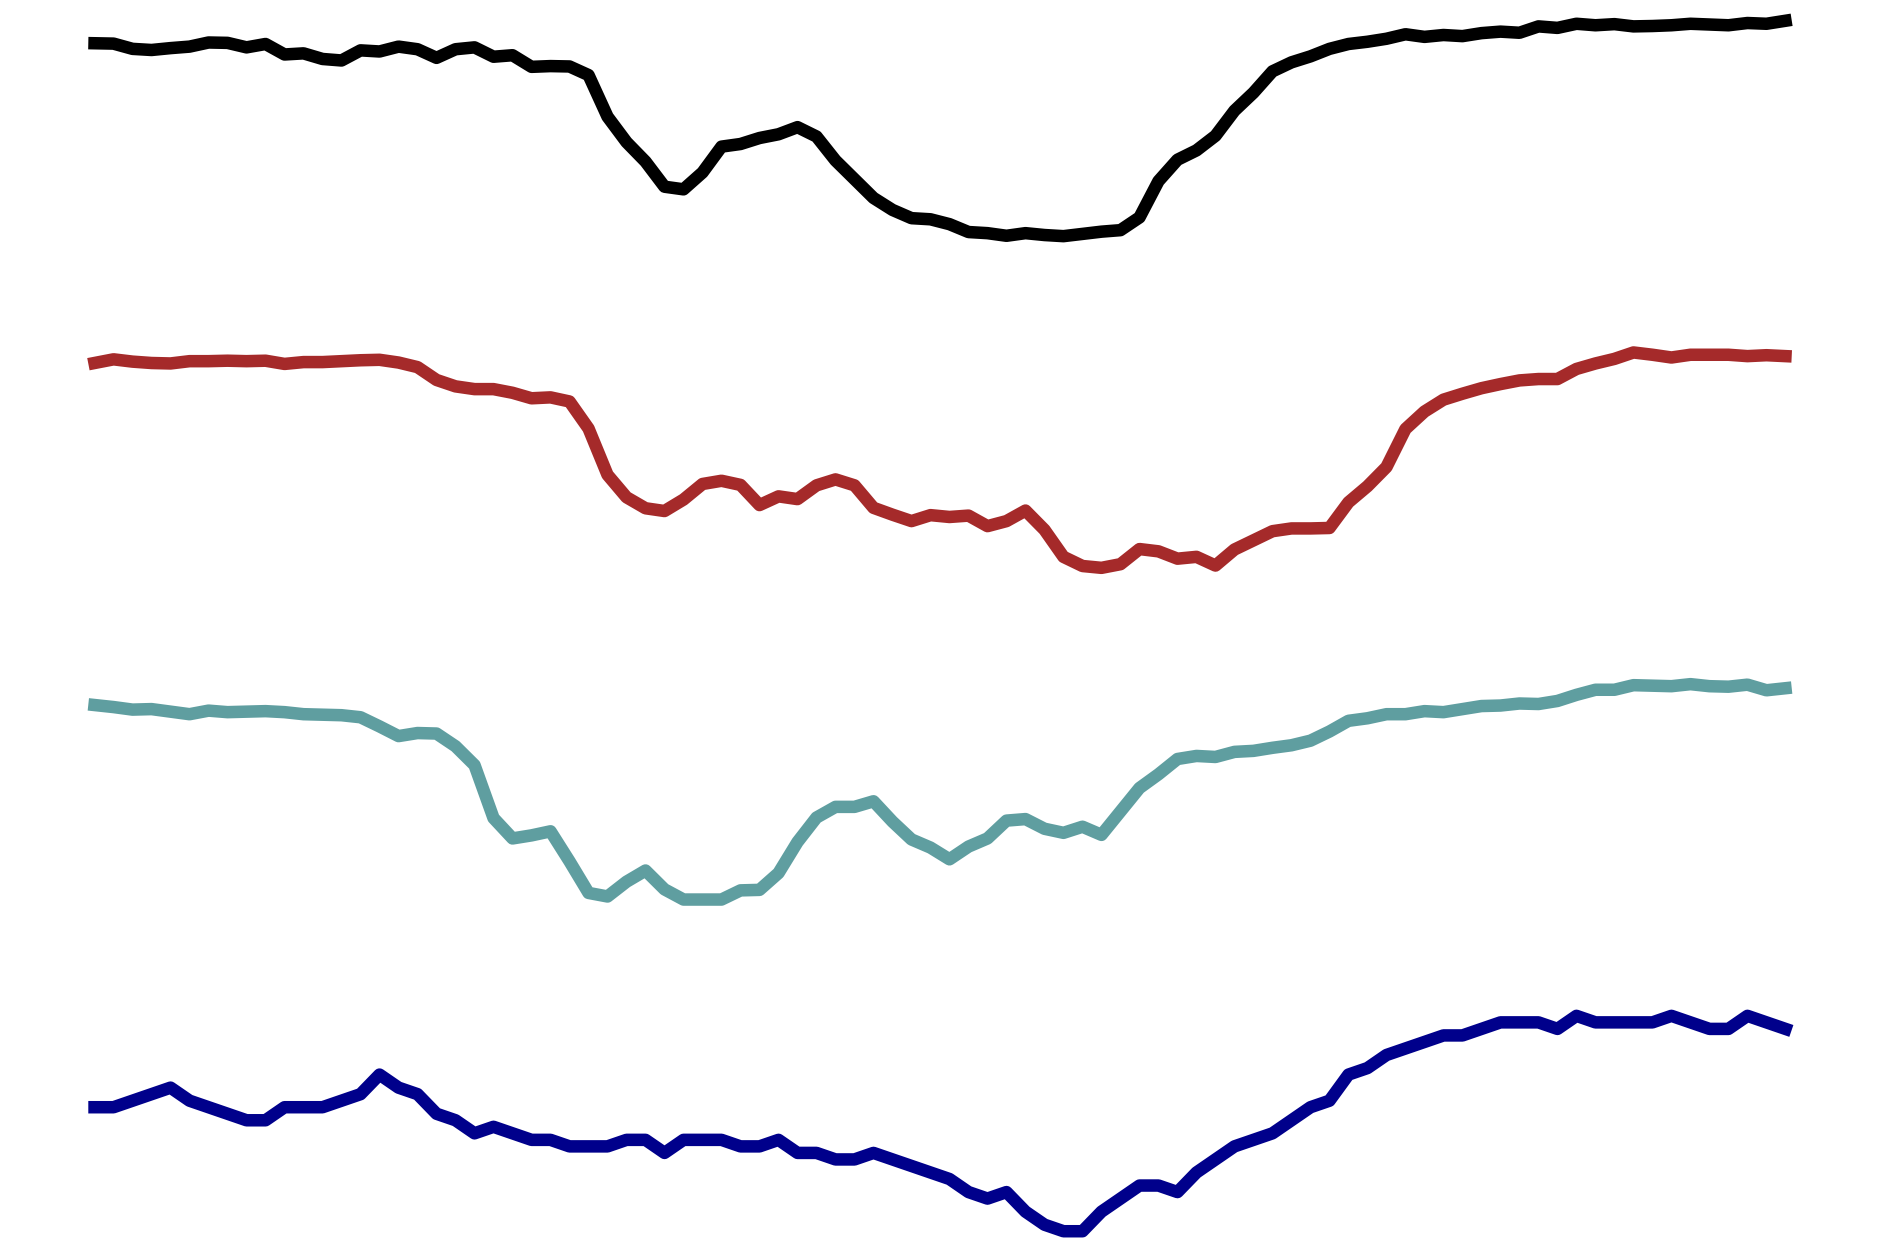

In [20]:
nodes = [6,8,11,12]
# 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[450:540, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
# colors = ['red', 'blue', 'green', '#FFD700','#FFD700']

filtered_colors =  [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]

# 根据 drawed_data 的长度选择颜色
selected_colors = filtered_colors[:len(nodes)]

fig, axs = plt.subplots(len(nodes), figsize=(6*len(nodes), 4*len(nodes)), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
for i, node_i in enumerate(nodes):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], color=selected_colors[i], linewidth=9)
    axs[i].axis('off')

# fig

plt.savefig('traffics_t2s.svg', format='svg', bbox_inches='tight')



In [51]:
drawed_data.shape

(180, 5)

In [64]:
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
drawed_data = dataset.df.iloc[400:1000].copy()
selected_columns = [ 1,2,3, 6,8,9]
colors = ['blue', 'green', 'red', 'c', 'magenta']

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()


## 3.4 s2s

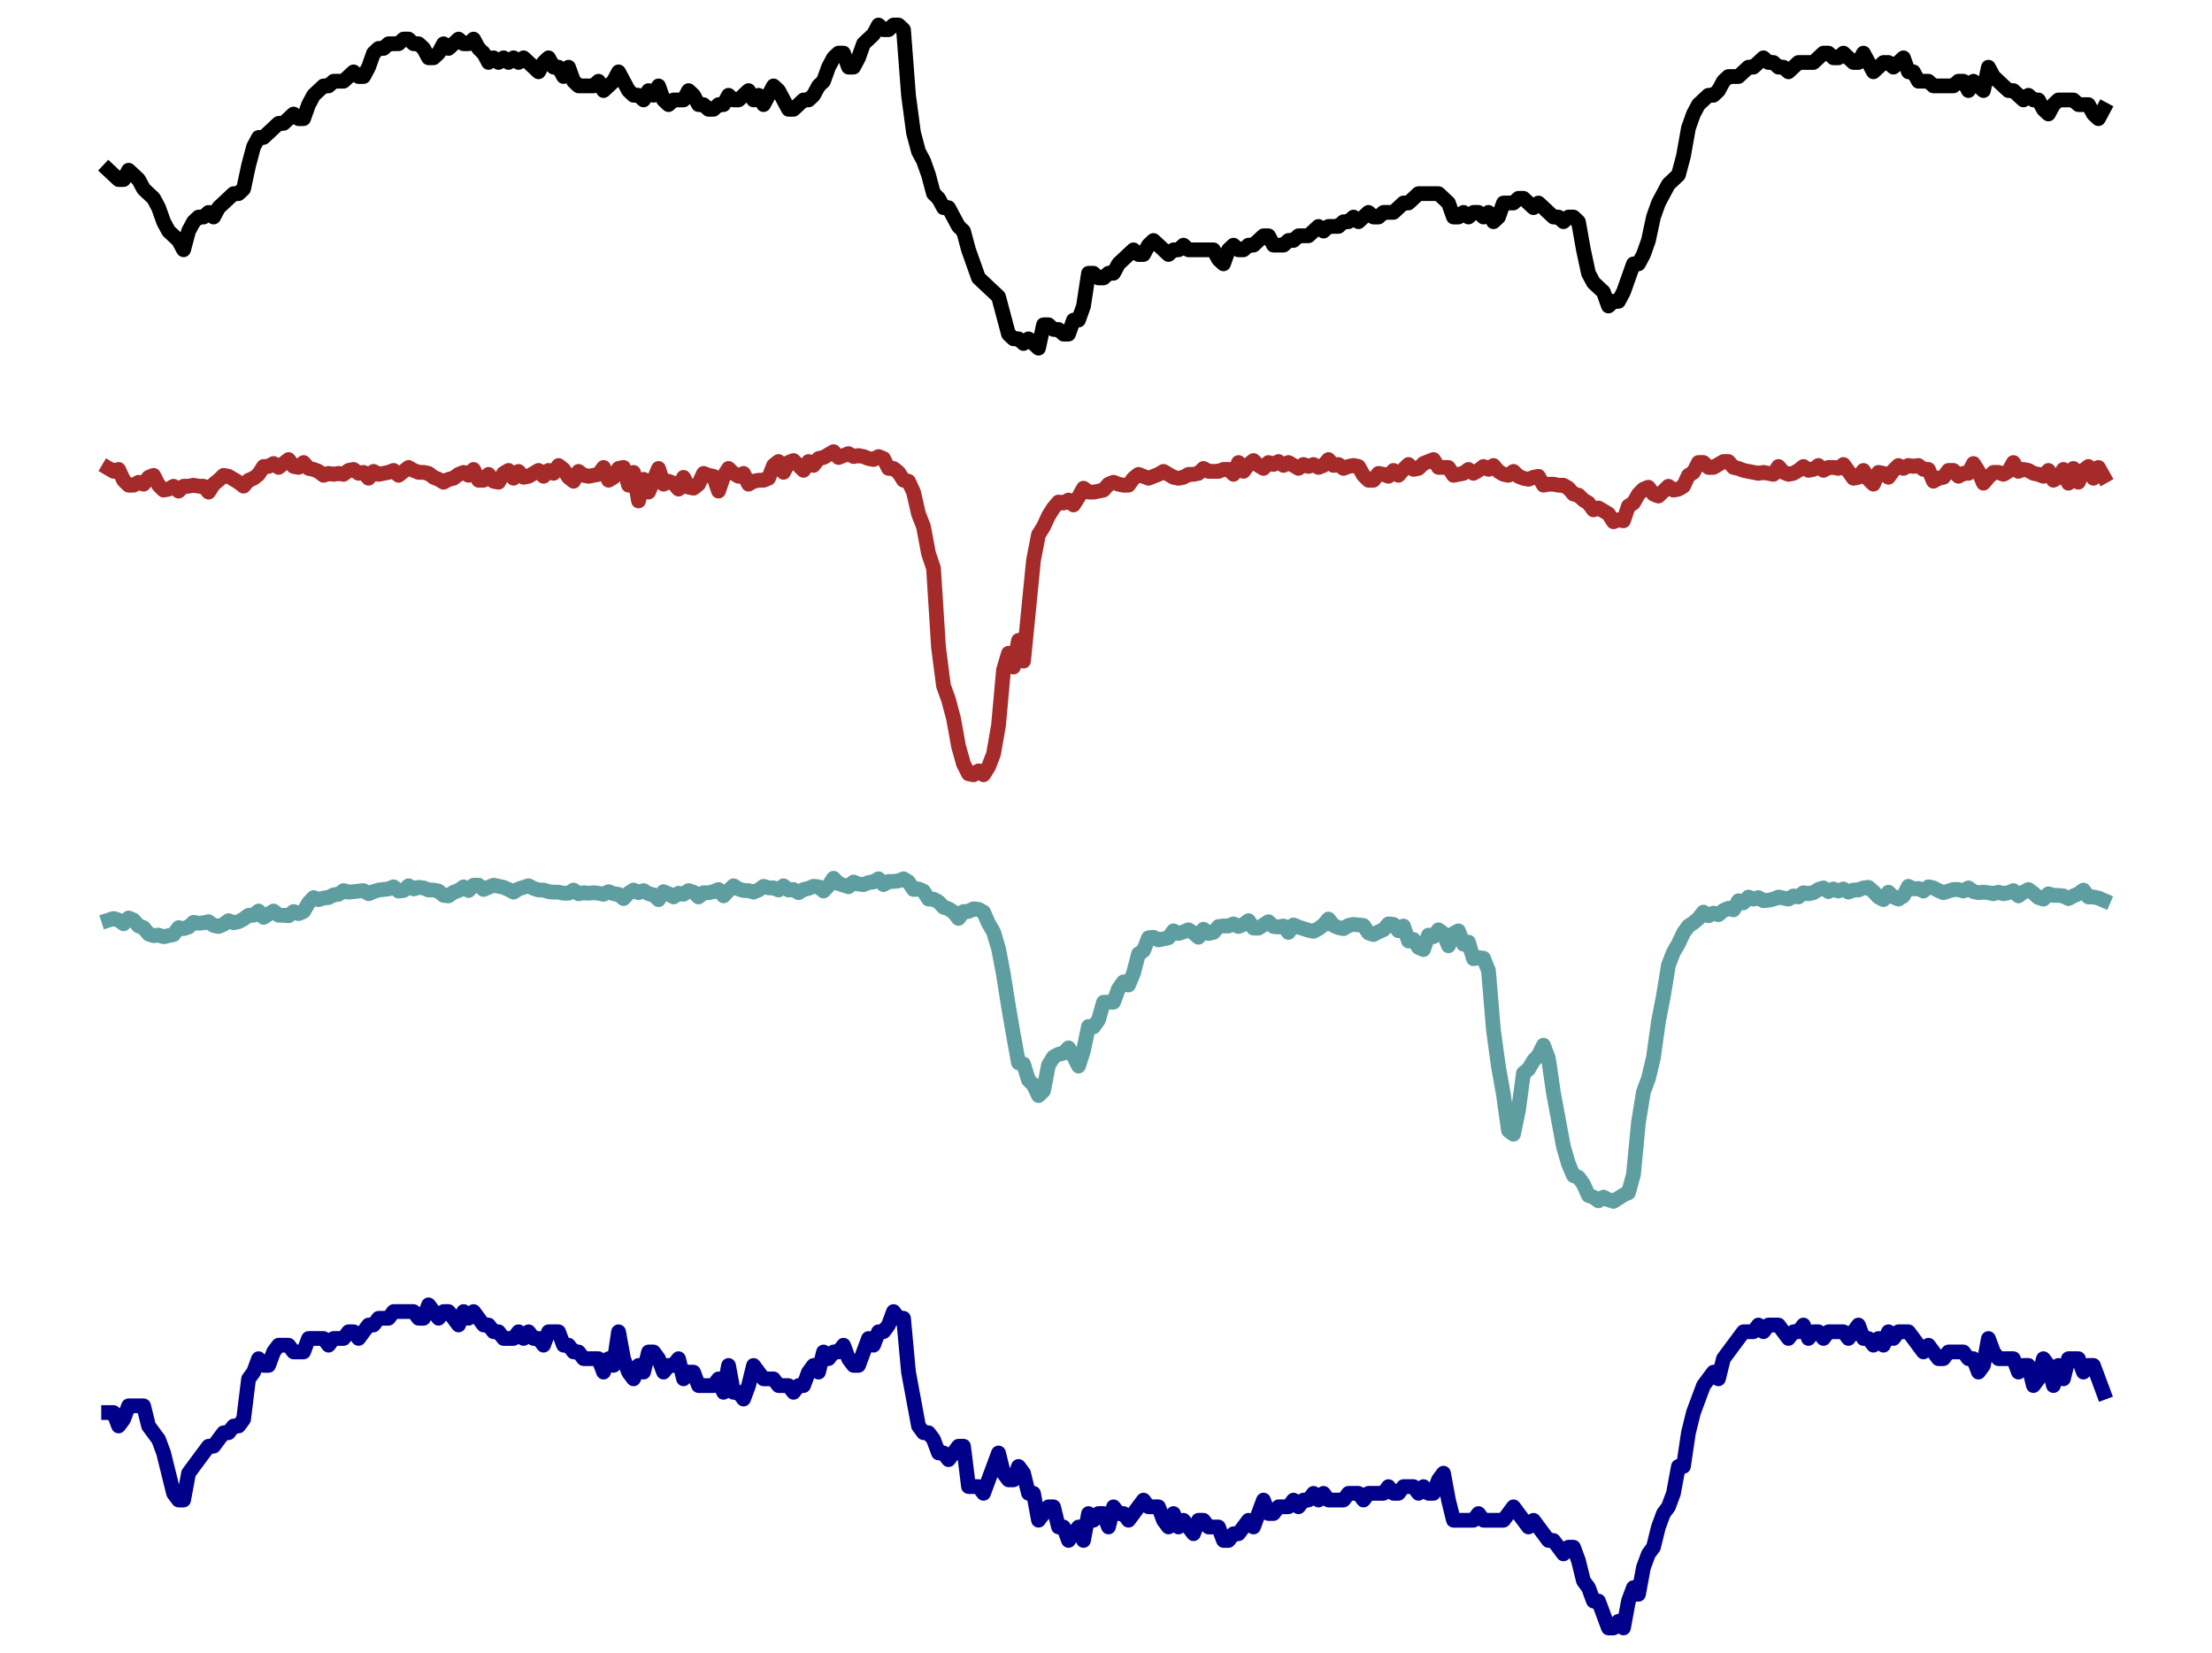

In [18]:
nodes = [4,5,6,7]

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

drawed_data = dataset.df.values[200:600, nodes]
# 获取所有的基础颜色
all_colors = list(mcolors.CSS4_COLORS.keys())
# 过滤掉一些太亮或者和白色太接近的颜色
filtered_colors = [c for c in all_colors if max(mcolors.hex2color(c)) < 0.8]
# 根据 drawed_data 的长度选择颜色
selected_colors = filtered_colors[:len(nodes)]

fig, axs = plt.subplots(len(nodes), figsize=( 8*len(nodes), 6*len(nodes)))
for i in range(len(nodes)):
    # 绘制时序数据
    # 设置线条宽度为2
    axs[i].plot(drawed_data[:, i], color=selected_colors[i], linewidth=12)
    axs[i].axis('off')
# fig

plt.savefig('traffics1.svg', format='svg', bbox_inches='tight')



In [ ]:
1

## 3.5 t perspective

NameError: name 'dataset' is not defined

In [4]:
fig.savefig('t_perspective.svg', format='svg', bbox_inches='tight')


In [26]:
dataset.df[50:53].index

DatetimeIndex(['2017-01-01 04:10:00', '2017-01-01 04:15:00',
               '2017-01-01 04:20:00'],
              dtype='datetime64[ns]', freq=None)

# 4 heterogeneity  




4.1 original data

In [39]:
from torch_timeseries.datasets.wrapper import MultiStepTimeFeatureSet
from torch_timeseries.data.scaler import StandarScaler

scaler = StandarScaler()
train_dataset = MultiStepTimeFeatureSet(
    dataset=dataset,
    scaler=scaler,
    time_enc=0,
    window=168,
    horizon=1,
    steps=3,
    freq='h',
    scaler_fit=True,
)


In [40]:
# for i,data in enumerate(train_dataset):
#     print(data[0].shape)
#     break

# (168, 325)


# 这里循环中data[0]是个 (168, 325) 的变量，总共有 51946 个



In [41]:
data = train_dataset[300][0]

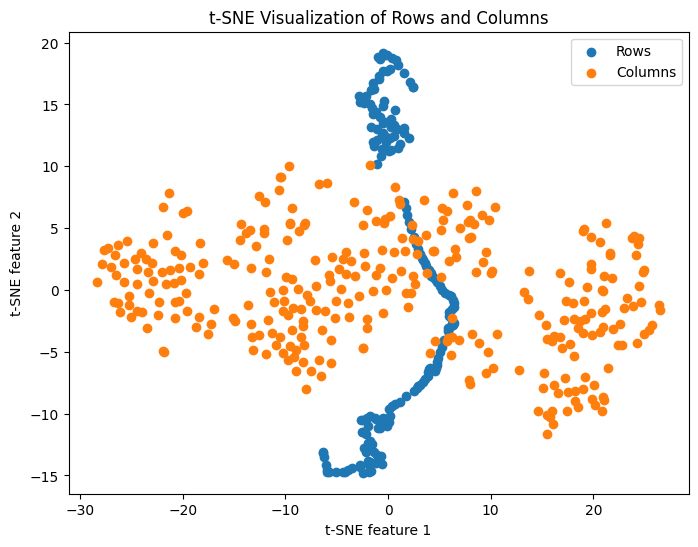

In [42]:

# 对行进行t-SNE降维
tsne_rows = TSNE(n_components=2, random_state=42)
data_tsne_rows = tsne_rows.fit_transform(data)

# 对列进行t-SNE降维
tsne_cols = TSNE(n_components=2, random_state=42)
data_tsne_cols = tsne_cols.fit_transform(data.T)  # 使用转置矩阵来对列进行降维

# 在同一个图中绘制行和列的降维结果
plt.figure(figsize=(8, 6))

# 绘制行的降维结果
plt.scatter(data_tsne_rows[:, 0], data_tsne_rows[:, 1], label="Rows")

# 绘制列的降维结果
plt.scatter(data_tsne_cols[:, 0], data_tsne_cols[:, 1], label="Columns")

# 添加图例、标题和坐标轴标签
plt.legend()
plt.title("t-SNE Visualization of Rows and Columns")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")

plt.show()


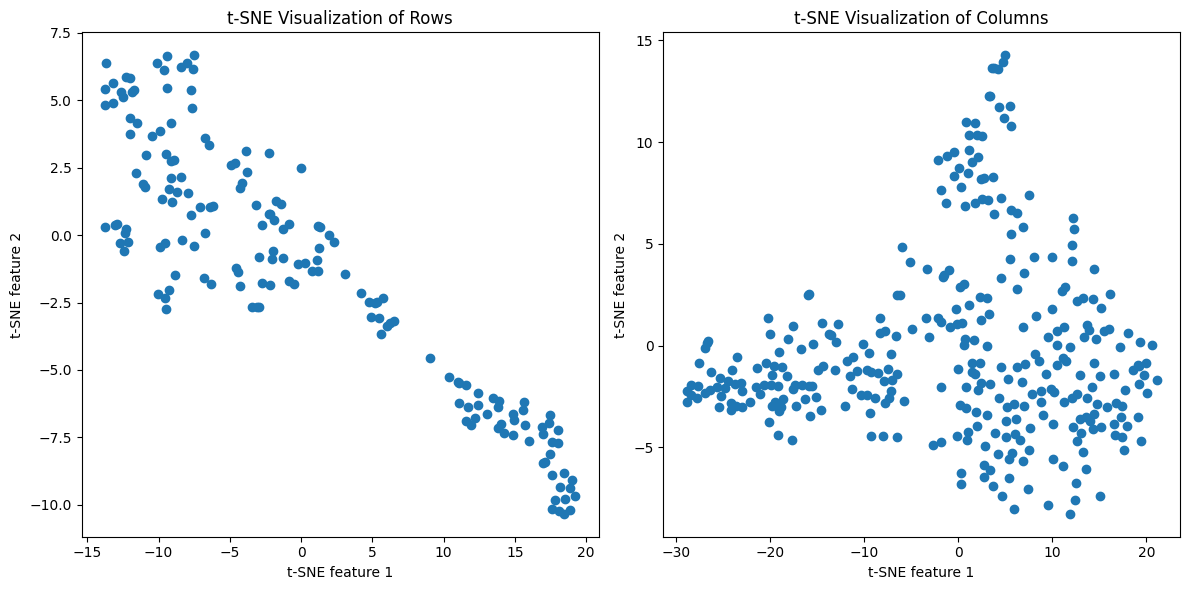

In [18]:
# import matplotlib.pyplot as plt

# # 假设 data_tsne_rows 和 data_tsne_cols 是降维结果
# # 这里我们用随机数据代替，以便在您的环境中运行
# np.random.seed(42)
# # data_tsne_rows = np.random.rand(168, 2)
# # data_tsne_cols = np.random.rand(325, 2)

# # 绘制行的降维结果
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(data_tsne_rows[:, 0], data_tsne_rows[:, 1])
# plt.title("t-SNE Visualization of Rows")
# plt.xlabel("t-SNE feature 1")
# plt.ylabel("t-SNE feature 2")

# # 绘制列的降维结果
# plt.subplot(1, 2, 2)
# plt.scatter(data_tsne_cols[:, 0], data_tsne_cols[:, 1])
# plt.title("t-SNE Visualization of Columns")
# plt.xlabel("t-SNE feature 1")
# plt.ylabel("t-SNE feature 2")

# plt.tight_layout()
# plt.show()


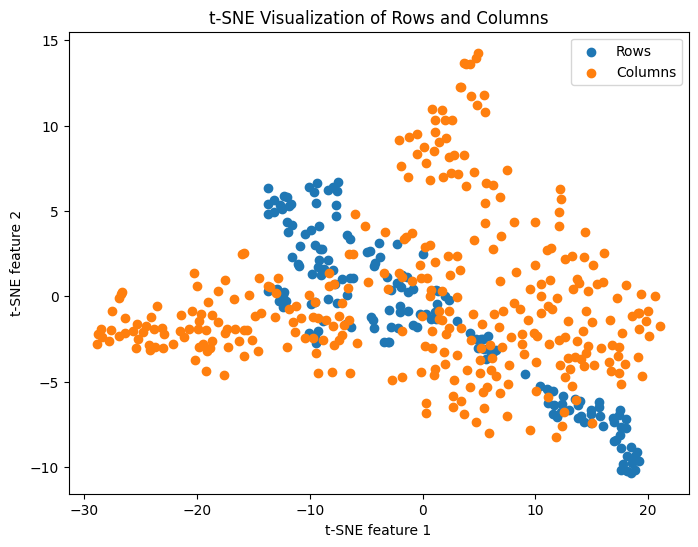

In [9]:
features

array([4.97837524, 1.55788177])